## Strip (Channel, Rectangular) Waveguide

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import meep as mp

mp.verbosity(0);  # 0: minimal output; 1: a little; 2: a lot; 3: debugging

In [61]:
wavelength = 1.31  # Wavelength in µm
n_Si = 3.50685     # 3.50685 (1.31 µm) | 3.47638 (1.55 µm) 
n_SiO2 = 1.44672   # 1.44672 (1.31 µm) | 1.44400 (1.55 µm)
h_Si = 0.22        # Thickness in µm
w_Si = 0.41        # Width in µm
d_pml = 1.0        # PML thickness in µm
resolution = 50    # pixels/µm
fcen = 1/wavelength

In [62]:
## Geometry
geometry = [mp.Block(size = mp.Vector3(mp.inf, h_Si, w_Si),
                     center = mp.Vector3(),
                     material = mp.Medium(index=n_Si))]
## Simulation Domain
lx = int(1*wavelength*10)/10
ly = int(5*h_Si*10)/10
lz = int(4*w_Si*10)/10
sx = lx + 2*d_pml
sy = ly + 2*d_pml
sz = lz + 2*d_pml

## Light Source
sources = [mp.EigenModeSource(mp.ContinuousSource(frequency=fcen, fwidth=0.1*fcen),
                              center = mp.Vector3(-lx/2, 0, 0),
                              size = mp.Vector3(0, ly, lz),
                              eig_match_freq = True,  # Default True, try to find a mode with the same frequency as the src property
                              eig_band = 1,  # Integer or DiffractedPlaneWave class, default 1, index of the desired band where 1 denotes the lowest-frequency band at a given k point
                              eig_parity = mp.EVEN_Y+mp.ODD_Z)]  # TE-like mode (Ez,Hy,Hx,...); 
                              # eig_parity = mp.ODD_Y+mp.EVEN_Z)]  # TM-like mode (Hz,Ey,Ex,...)
## Simulation Object
sim = mp.Simulation(geometry = geometry,
                    cell_size = mp.Vector3(sx, sy, sz),
                    boundary_layers = [mp.PML(d_pml)],
                    sources = sources,
                    resolution = resolution,
                    default_material = mp.Medium(index=n_SiO2))

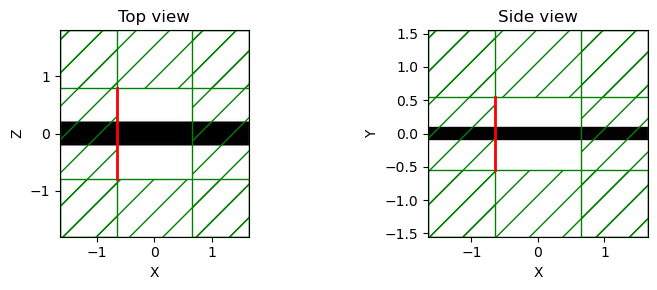

In [63]:
top_view = mp.simulation.Volume(center=mp.Vector3(), size=mp.Vector3(sx,0,sz)) # x-z 上視圖
side_view = mp.simulation.Volume(center=mp.Vector3(), size=mp.Vector3(sx,sy,0))  # x-y 側面圖

fig, axs = plt.subplots(1,2,figsize=(8,3))
sim.plot2D(output_plane=top_view, ax=axs[0])
axs[0].set_title("Top view")
sim.plot2D(output_plane=side_view, ax=axs[1])
axs[1].set_title("Side view")
fig.tight_layout()

In [64]:
sim.reset_meep()
sim.run(until=20)
## stop_when_fields_decayed(dt, component, location, decay_by)
## keep incrementing runtime by dt
# sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(lx/2,0,0), 1e-6))

FloatProgress(value=0.0, description='0% done ', max=20.0)

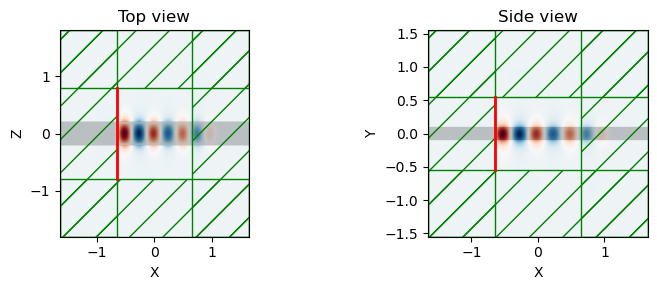

In [65]:
fig, axs = plt.subplots(1,2, figsize=(8,3))
sim.plot2D(output_plane=top_view, fields=mp.Ez, ax=axs[0])
axs[0].set_title("Top view")
sim.plot2D(output_plane=side_view, fields=mp.Ez, ax=axs[1])
axs[1].set_title("Side view")
fig.tight_layout()

In [66]:
cross_section = mp.simulation.Volume(center=mp.Vector3(), size=mp.Vector3(0,ly,lz))
field = sim.get_array(component=mp.Ez, vol=cross_section)  # (y, z)
print("y:", ly)
print("z:", lz)
print(field.shape)

y: 1.1
z: 1.6
(58, 82)


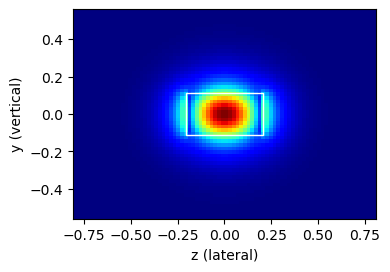

In [67]:
zz, yy = np.meshgrid(np.linspace(-lz/2, lz/2, field.shape[1]),
                     np.linspace(-ly/2, ly/2, field.shape[0]))

fig, ax = plt.subplots(figsize=(4,3))
# sim.plot2D(output_plane=cross_section, fields=mp.Ez, ax=ax)
ax.pcolormesh(zz, yy, np.abs(field), cmap="jet")
ax.add_patch(plt.Rectangle((-w_Si/2, -h_Si/2), w_Si, h_Si, lw=1, ec='w', fc='none'))
ax.set(xlabel='z (lateral)', ylabel='y (vertical)')
ax.set_aspect('equal')
fig.tight_layout()